In [9]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as pt
import seaborn as sn
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [95]:
sp=pd.read_csv("50_startups.csv")

In [11]:
sp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
sp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
sp.isna().sum()

RDS               0
Administration    0
MSP               0
State             0
Profit            0
dtype: int64

## Correlation

In [14]:
sp.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [16]:
sp=sp.rename({"R&D Spend":"RDS","Marketing Spend":"MSP"},axis=1)

In [17]:
sp.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


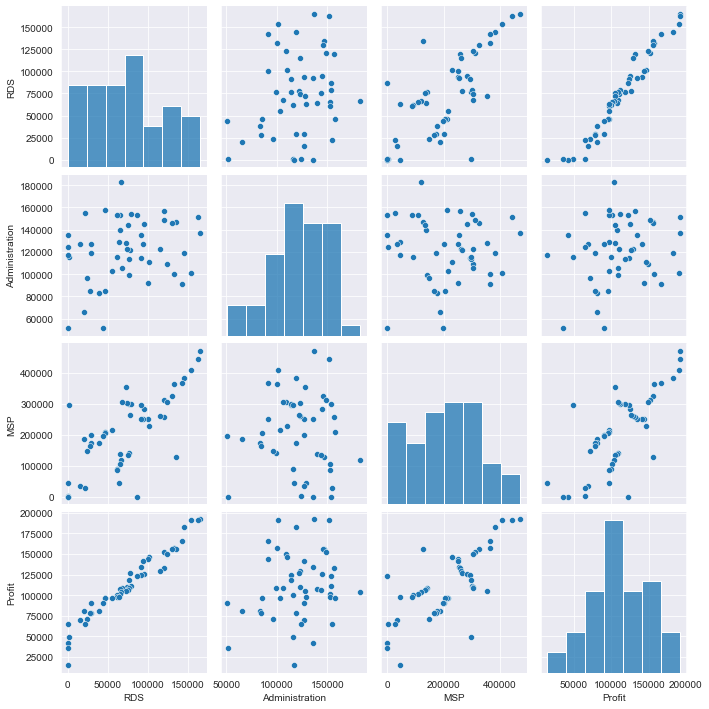

In [23]:
sn.set_style(style='darkgrid')
sn.pairplot(sp)

## Model Building

In [26]:
model=smf.ols("Profit~RDS+Administration+MSP",data=sp).fit()

## Machine Testing

In [27]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MSP                   0.027228
dtype: float64

In [40]:
model.tvalues,np.round(model.pvalues,5)

(Intercept          7.626218
 RDS               17.846374
 Administration    -0.525507
 MSP                1.655077
 dtype: float64,
 Intercept         0.00000
 RDS               0.00000
 Administration    0.60176
 MSP               0.10472
 dtype: float64)

In [41]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## Simple Linear Regression Models

In [44]:
sp_b=smf.ols("Profit~Administration",data=sp).fit()
sp_b.tvalues,sp_b.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [45]:
sp_c=smf.ols("Profit~MSP",data=sp).fit()
sp_c.tvalues,sp_c.pvalues

(Intercept    7.808356
 MSP          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MSP          4.381073e-10
 dtype: float64)

In [47]:
sp_bc=smf.ols("Profit~Administration+MSP",data=sp).fit()
sp_bc.tvalues,sp_bc.pvalues

(Intercept         1.142741
 Administration    2.467779
 MSP               8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MSP               9.727245e-11
 dtype: float64)

# Model Validation Technique

## Calculate VIF = 1/(1-Rsquare) for all independent variables

In [52]:
rsq_rds=smf.ols("RDS~Administration+MSP",data=sp).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols("Administration~RDS+MSP",data=sp).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_msp=smf.ols("MSP~RDS+Administration",data=sp).fit().rsquared
vif_msp=1/(1-rsq_msp)

d1={'variables':['RDS','Administration','MSP'],'vif':[vif_rds,vif_adm,vif_msp]}
vif_df=pd.DataFrame(d1)
vif_df

,variables,vif
0,RDS,2.468903
1,Administration,1.175091
2,MSP,2.326773


## 2) Residual Analysis
## Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<function matplotlib.pyplot.show(close=None, block=None)>

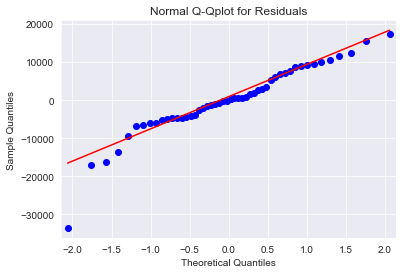

In [54]:
import statsmodels.api as sl
sl.qqplot(model.resid,line='q')
pt.title("Normal Q-Qplot for Residuals")
pt.show

In [55]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [56]:
def standard_values(vals): return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

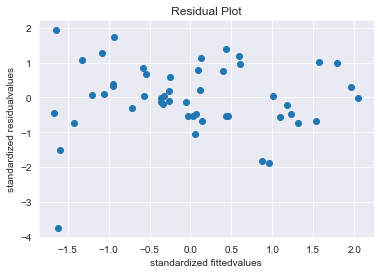

In [58]:
pt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))

pt.title("Residual Plot")
pt.xlabel('standardized fittedvalues')
pt.ylabel('standardized residualvalues')
pt.show

## Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

<function matplotlib.pyplot.show(close=None, block=None)>

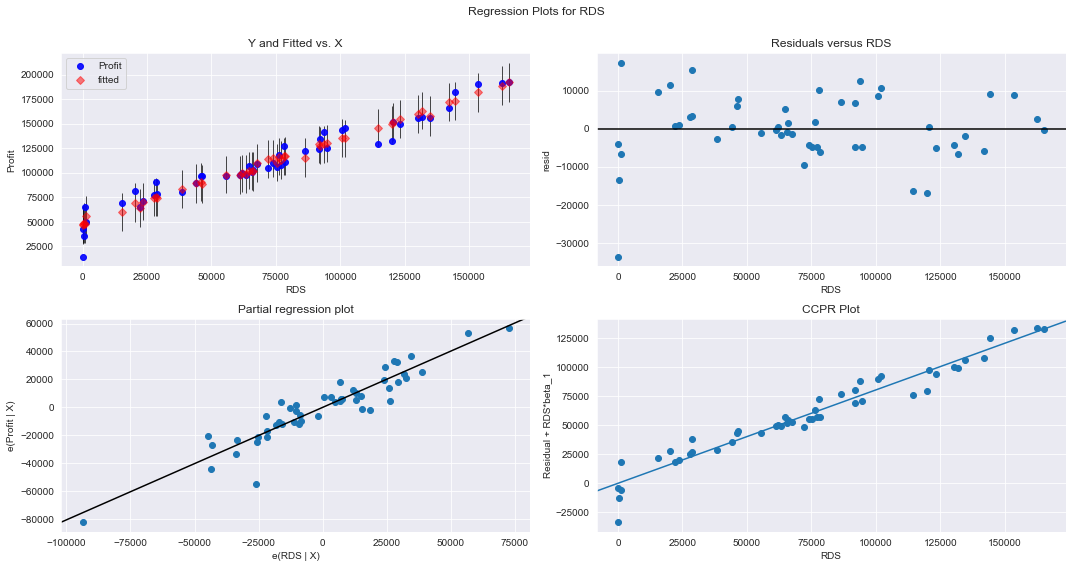

In [60]:
fig=pt.figure(figsize=(15,8))
sl.graphics.plot_regress_exog(model,'RDS',fig=fig)
pt.show

<function matplotlib.pyplot.show(close=None, block=None)>

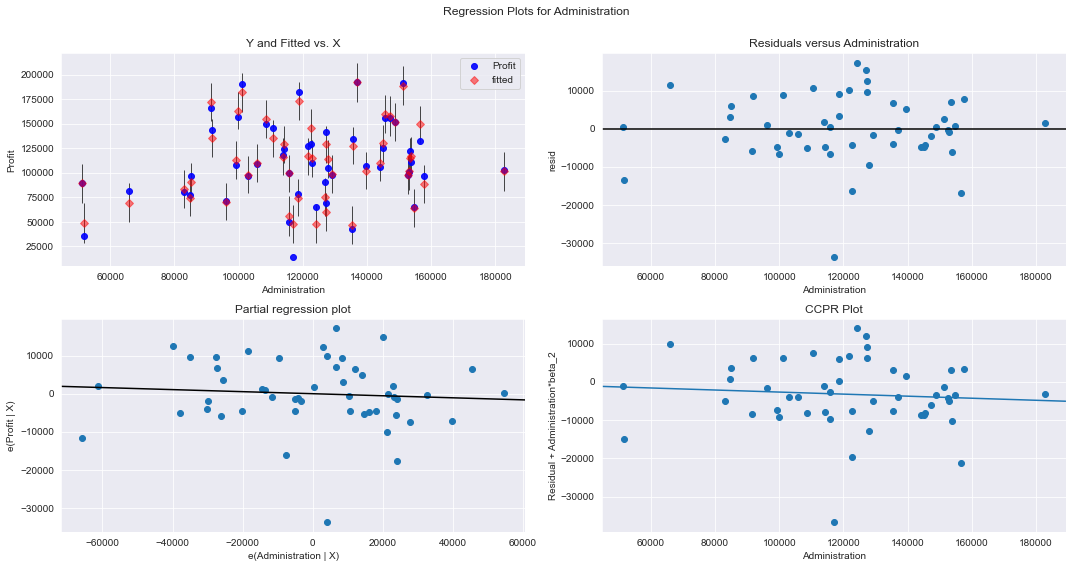

In [63]:
fig=pt.figure(figsize=(15,8))
sl.graphics.plot_regress_exog(model,'Administration',fig=fig)
pt.show

<function matplotlib.pyplot.show(close=None, block=None)>

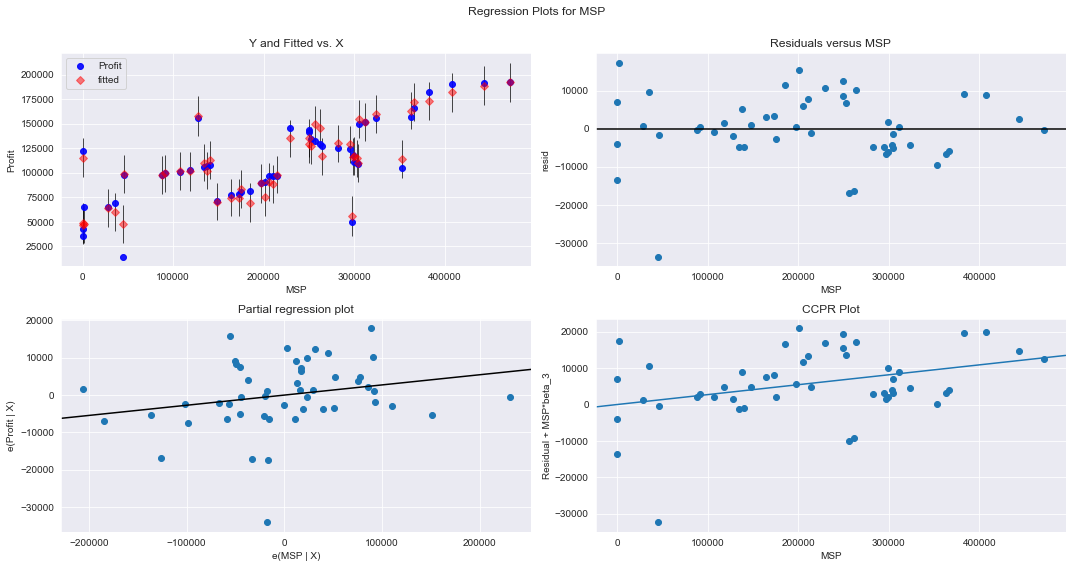

In [67]:
fig=pt.figure(figsize=(15,8))
sl.graphics.plot_regress_exog(model,'MSP',fig=fig)
pt.show

## Model Deletion Diagnostics(Checking Outliers or Influencers)

### 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
### Get influencers using cook's distance

In [68]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

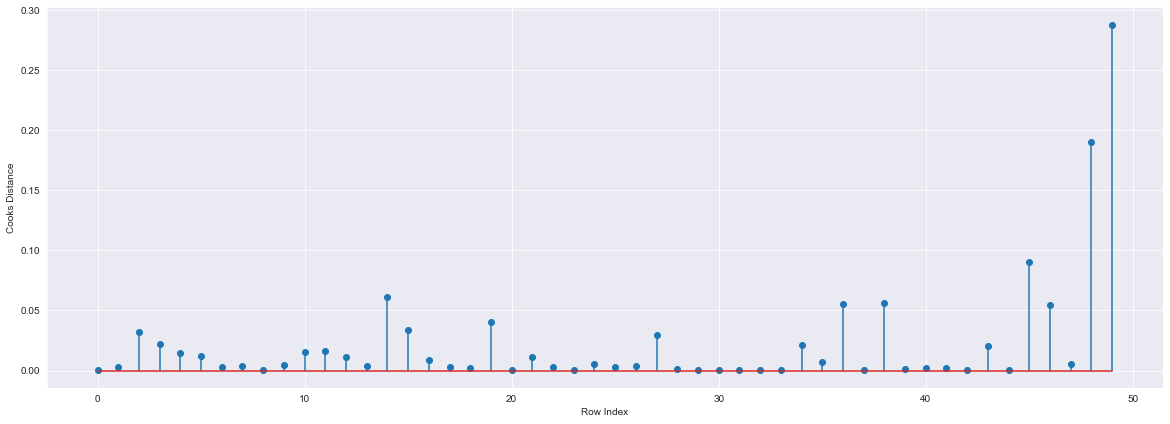

In [71]:
fig=pt.figure(figsize=(20,7))
pt.stem(np.arange(len(sp)),np.round(c,5))
pt.xlabel('Row Index')
pt.ylabel('Cooks Distance')
pt.show()

In [72]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

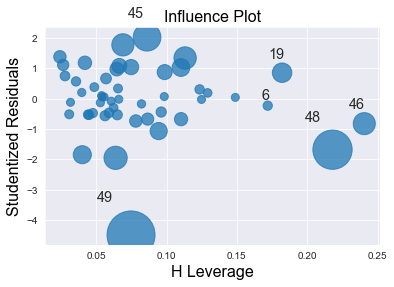

In [73]:
influence_plot(model)
pt.show()

In [74]:
k=sp.shape[1]
n=sp.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.36

In [75]:
sp[sp.index.isin([49])]

,RDS,Administration,MSP,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving Model 

In [83]:
sp1=sp.drop(sp.index[[49]],axis=0).reset_index(drop=True)
sp1.tail()

,RDS,Administration,MSP,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


## Model Deletion Diagnostics and Final Model

In [84]:
model1=smf.ols("Profit~RDS+Administration+MSP",data=sp1).fit()

In [85]:
while model1.rsquared<0.99:
    for c in [np.max(c)>1]:
        model1=smf.ols("Profit~RDS+Administration+MSP",data=sp1).fit()
        (c,_)=model1.get_influence().cooks_distance
        c
        np.argmax(c),np.max(c)
        sp1=sp1.drop(sp1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        sp1
    else:
        final_model=smf.ols("Profit~RDS+Administration+MSP",data=sp1).fit()
        final_model.rsquared,final_model.aic
        print("Thus model Accuracy is improved to ",final_model.rsquared)

Thus model Accuracy is improved to  0.9626766170294073
Thus model Accuracy is improved to  0.9614129113440602
Thus model Accuracy is improved to  0.962593650298269
Thus model Accuracy is improved to  0.9638487279209415
Thus model Accuracy is improved to  0.9663901957918793
Thus model Accuracy is improved to  0.9706076169779905
Thus model Accuracy is improved to  0.9727840588916423
Thus model Accuracy is improved to  0.9734292907181952
Thus model Accuracy is improved to  0.9785801571833451
Thus model Accuracy is improved to  0.9777383743090916
Thus model Accuracy is improved to  0.9790510088977512
Thus model Accuracy is improved to  0.9790004461890552
Thus model Accuracy is improved to  0.9807878666153609
Thus model Accuracy is improved to  0.9838299343609735
Thus model Accuracy is improved to  0.9831149926392769
Thus model Accuracy is improved to  0.9833768520972176
Thus model Accuracy is improved to  0.9878892536376698
Thus model Accuracy is improved to  0.9877191935547199
Thus model 

In [86]:
final_model.rsquared

0.9882757054424702

In [87]:
sp1

,RDS,Administration,MSP,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


## Model Predictions

In [88]:
new_data=pd.DataFrame({'RDS':89000,'Administration':33445,'MSP':389},index=[0])
new_data

,RDS,Administration,MSP
0,89000,33445,389


In [91]:
final_model.predict(new_data)

0    109998.046788
dtype: float64

In [92]:
pred_y=final_model.predict(sp1)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

## Table containing R^2 value for each prepared model

In [93]:
d1={'Prep_models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d1)
table

,Prep_models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
